<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/UTS/UTS_Machine_Learning_K_Means_Clustering_with_Country_Data_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Machine Learning**

### **K-Means Clustering with `Country Data` Dataset.**

Nama : `Rizka Rahmadina`

NIM : `1103204115`

In [1]:
# Mengimpor library pandas (pd)
import pandas as pd

# Mengimpor modul pyplot dari library matplotlib (plt)
import matplotlib.pyplot as plt

# Mengimpor kelas KMeans dari modul cluster dalam library scikit-learn.
from sklearn.cluster import KMeans

# Mengimpor fungsi silhouette_score dari modul metrics dalam library scikit-learn
from sklearn.metrics import silhouette_score

# Mengimpor fungsi davies_bouldin_score dari modul metrics dalam library scikit-learn.
from sklearn.metrics import davies_bouldin_score

# Mengimpor fungsi calinski_harabasz_score dari modul metrics dalam library scikit-learn.
from sklearn.metrics import calinski_harabasz_score

# digunakan untuk melakukan normalisasi data dengan mengubah setiap fitur sehingga memiliki mean 0 dan varians 1. Normalisasi ini membantu memastikan bahwa setiap fitur berkontribusi sebanding terhadap perhitungan dalam algoritma machine learning.
from sklearn.preprocessing import StandardScaler

#  digunakan untuk membuat pipeline machine learning dengan cara yang lebih sederhana.
from sklearn.pipeline import make_pipeline

prompt : buatlah sebuah kode menggunakan pustaka pandas untuk membaca file CSV dalam suatu dataframe yang disebut `df`.

In [ ]:
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('/content/Country-data.csv')

prompt : buatlah sebuah kode untuk menampilkan bentuk (shape) dari dataframe tersebut.

EDA

Analisis Eksploratif Data (EDA) - Exploratory Data Analysis :

Kode EDA ini membaca file CSV, memilih beberapa kolom, dan membuat beberapa visualisasi seperti histogram dan pair plot untuk menganalisis distribusi dan hubungan antar variabel.

Menampilkan Shape dari DataFrame:

Output ini adalah hasil dari fungsi df.shape yang memberikan dimensi DataFrame. Informasi ini mencakup jumlah baris dan kolom dalam DataFrame.

In [ ]:
# Menampilkan bentuk (shape) dari DataFrame
df.shape

(167, 10)

prompt : buatlah sebuah kode untuk menampilkan informasi (info) dari dataframe tersebut.

Menampilkan Informasi DataFrame:

Output ini adalah hasil dari fungsi df.info(), yang memberikan informasi rinci tentang DataFrame, termasuk jumlah nilai non-null, tipe data, dan penggunaan memori.

In [ ]:
# Menampilkan informasi (info) dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


prompt : buatlah sebuah kode untuk menampilkan ringkasan statistik deskriptif  dari dataframe tersebut

In [ ]:
# Menampilkan ringkasan statistik deskriptif dari DataFrame
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


prompt : buatlah sebuah kode untuk menampilkan beberapa baris awal  dari dataframe tersebut.

In [ ]:
# Menampilkan lima baris pertama dari DataFrame
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


prompt : buatlah sebuah kode untuk menghapus kolom 'country'  dari dataframe tersebut secara permanen dan tampilkan dataframe setelah penghapusan

In [ ]:
# Menghapus kolom 'country' secara permanen
df.drop(['country'], axis=1, inplace=True)

# Menampilkan DataFrame setelah penghapusan
print("DataFrame setelah menghapus kolom 'country':")
print(df)

DataFrame setelah menghapus kolom 'country':
     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    

prompt : buatlah sebuah kode untuk melakukan analisis elbow untuk menentukan jumlah optimal dari klaster (clusters) menggunakan algoritma K-Means pada kolom 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec ', 'total_fer', 'gdpp '. Serta tampilkan hasil analisis elbow dalam bentuk grafik.

Analisis Elbow untuk Menentukan Jumlah Klaster Optimal:

Kode ini menggunakan metode elbow untuk menentukan jumlah optimal klaster dalam data menggunakan K-Means clustering.

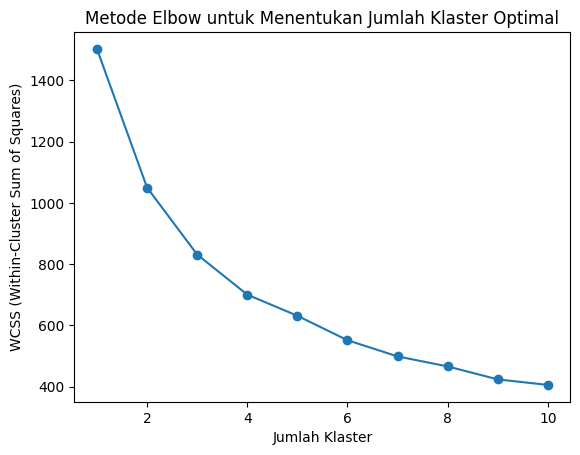

In [ ]:
# Memilih kolom yang akan digunakan untuk analisis elbow
kolom_analisis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_analisis = df[kolom_analisis]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_analisis)

# Melakukan analisis elbow untuk menentukan jumlah optimal dari klaster
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Menampilkan grafik elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

prompt : buatlah sebuah kode untuk melakukan K-Means clustering pada kolom 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec ', 'total_fer', 'gdpp' dengan jumlah klaster sebanyak 5. tambahkan kolom 'label' ke dataframe untuk menandai klaster setiap data, serta tampilkan scatter plot hasil clustering dengan warna yang berbeda untuk setiap cluster dan tandai pusat cluster (centroids) dengan warna kuning

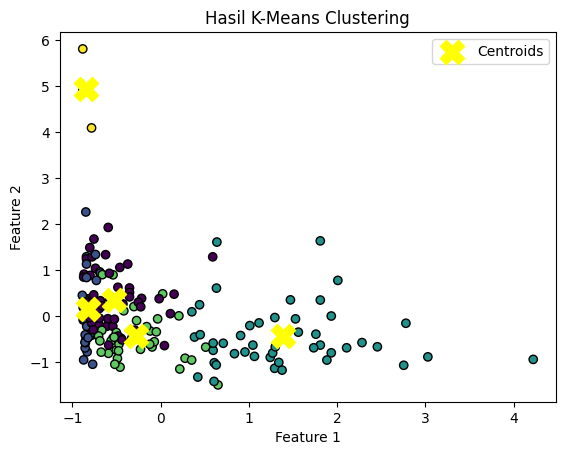

In [ ]:
# Memilih kolom yang akan digunakan untuk K-Means clustering
kolom_clustering = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_clustering = df[kolom_clustering]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Melakukan K-Means clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['label'] = kmeans.fit_predict(data_scaled)

# Menampilkan scatter plot hasil clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['label'], cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')
plt.title('Hasil K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

prompt : buatlah sebuah kode untuk melakukan analisis silhoutte score untuk menentukan jumlah optimal dari cluster menggunakan algoritma K-Means pada kolom 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec ', 'total_fer', 'gdpp'. tampilkan hasil analisis dalam bentuk grafik dan sertakan nilai silhoutte score untuk setiap jumlah klaster



Analisis Silhouette Score untuk Menentukan Jumlah Klaster Optimal:

Kode ini menggunakan Silhouette Score untuk menentukan jumlah optimal klaster dalam data menggunakan K-Means clustering dan menampilkan grafik hasil analisis.

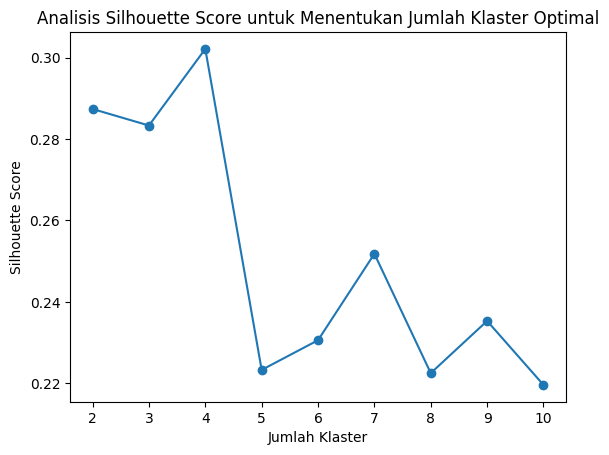

Jumlah Klaster = 2, Silhouette Score = 0.28735668921406704
Jumlah Klaster = 3, Silhouette Score = 0.28329575683463126
Jumlah Klaster = 4, Silhouette Score = 0.3021082505899252
Jumlah Klaster = 5, Silhouette Score = 0.22327899566511256
Jumlah Klaster = 6, Silhouette Score = 0.23057357437984735
Jumlah Klaster = 7, Silhouette Score = 0.25179867083491136
Jumlah Klaster = 8, Silhouette Score = 0.222488864927923
Jumlah Klaster = 9, Silhouette Score = 0.23530641350791914
Jumlah Klaster = 10, Silhouette Score = 0.21959393524208187


In [ ]:
# Memilih kolom yang akan digunakan untuk analisis silhouette score
kolom_analisis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_analisis = df[kolom_analisis]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_analisis)

# Melakukan analisis silhouette score untuk menentukan jumlah optimal dari klaster
jumlah_klaster = range(2, 11)
silhouette_scores = []

for k in jumlah_klaster:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan grafik silhouette score
plt.plot(jumlah_klaster, silhouette_scores, marker='o')
plt.title('Analisis Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan nilai silhouette score untuk setiap jumlah klaster
for k, score in zip(jumlah_klaster, silhouette_scores):
    print(f'Jumlah Klaster = {k}, Silhouette Score = {score}')

prompt : buatlah sebuah kode untuk melakukan analisis davies-bouldin score untuk menentukan jumlah optimal dari cluster menggunakan algoritma K-Means pada kolom 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec ', 'total_fer', 'gdpp'. tampilkan hasil analisis dalam bentuk grafik dan sertakan nilai davies-bouldin score untuk setiap jumlah klaster

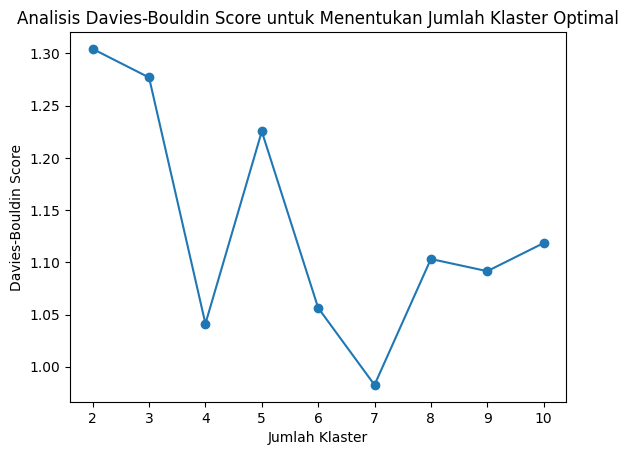

Jumlah Klaster = 2, Davies-Bouldin Score = 1.3042586920733252
Jumlah Klaster = 3, Davies-Bouldin Score = 1.2769056099698288
Jumlah Klaster = 4, Davies-Bouldin Score = 1.0412282465483789
Jumlah Klaster = 5, Davies-Bouldin Score = 1.2253186085634908
Jumlah Klaster = 6, Davies-Bouldin Score = 1.056419121392373
Jumlah Klaster = 7, Davies-Bouldin Score = 0.9826403534291682
Jumlah Klaster = 8, Davies-Bouldin Score = 1.1031748572941762
Jumlah Klaster = 9, Davies-Bouldin Score = 1.0915202025629238
Jumlah Klaster = 10, Davies-Bouldin Score = 1.1184109643701483


In [ ]:
# Memilih kolom yang akan digunakan untuk analisis Davies-Bouldin score
kolom_analisis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_analisis = df[kolom_analisis]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_analisis)

# Melakukan analisis Davies-Bouldin score untuk menentukan jumlah optimal dari klaster
jumlah_klaster = range(2, 11)
davies_bouldin_scores = []

for k in jumlah_klaster:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    davies_bouldin_avg = davies_bouldin_score(data_scaled, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Menampilkan grafik Davies-Bouldin score
plt.plot(jumlah_klaster, davies_bouldin_scores, marker='o')
plt.title('Analisis Davies-Bouldin Score untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Menampilkan nilai Davies-Bouldin score untuk setiap jumlah klaster
for k, score in zip(jumlah_klaster, davies_bouldin_scores):
    print(f'Jumlah Klaster = {k}, Davies-Bouldin Score = {score}')

prompt : buatlah sebuah kode untuk melakukan analisis calinski-harabasz score untuk menentukan jumlah optimal dari cluster menggunakan algoritma K-Means pada kolom 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec ', 'total_fer', 'gdpp'. tampilkan hasil analisis dalam bentuk grafik dan sertakan nilai calinski-harabasz score untuk setiap jumlah klaste

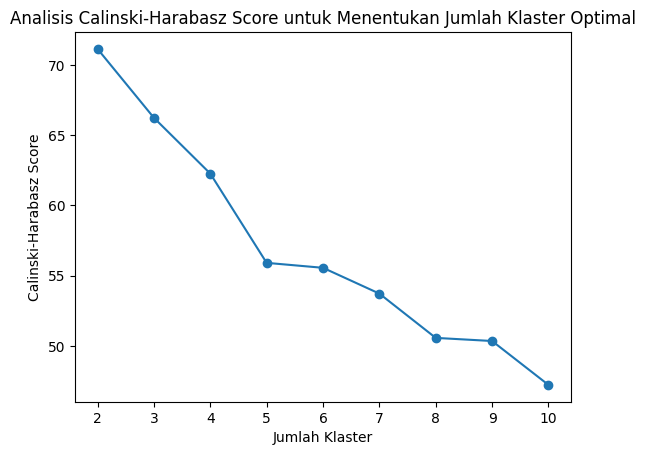

Jumlah Klaster = 2, Calinski-Harabasz Score = 71.13746166773552
Jumlah Klaster = 3, Calinski-Harabasz Score = 66.23475806200628
Jumlah Klaster = 4, Calinski-Harabasz Score = 62.262848020945185
Jumlah Klaster = 5, Calinski-Harabasz Score = 55.90905533826741
Jumlah Klaster = 6, Calinski-Harabasz Score = 55.55657753935109
Jumlah Klaster = 7, Calinski-Harabasz Score = 53.720307972881486
Jumlah Klaster = 8, Calinski-Harabasz Score = 50.56839621234813
Jumlah Klaster = 9, Calinski-Harabasz Score = 50.34612679088144
Jumlah Klaster = 10, Calinski-Harabasz Score = 47.220153977137514


In [ ]:
# Memilih kolom yang akan digunakan untuk analisis Calinski-Harabasz score
kolom_analisis = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data_analisis = df[kolom_analisis]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_analisis)

# Melakukan analisis Calinski-Harabasz score untuk menentukan jumlah optimal dari klaster
jumlah_klaster = range(2, 11)
calinski_harabasz_scores = []

for k in jumlah_klaster:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    calinski_harabasz_avg = calinski_harabasz_score(data_scaled, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Menampilkan grafik Calinski-Harabasz score
plt.plot(jumlah_klaster, calinski_harabasz_scores, marker='o')
plt.title('Analisis Calinski-Harabasz Score untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

# Menampilkan nilai Calinski-Harabasz score untuk setiap jumlah klaster
for k, score in zip(jumlah_klaster, calinski_harabasz_scores):
    print(f'Jumlah Klaster = {k}, Calinski-Harabasz Score = {score}')